# LEE Analyzer plots


## Imports & Constants

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 999
gr      = 1.618

mass_p= 0.93827 #GeV
mass_e= 0.00511 #GeV
fid_min=10

In [2]:
# True shower energy containment graphs
def effErr(teller,noemer):
    return np.sqrt(teller*(1-teller/noemer))/noemer


# Summed true shower energy, not corrected for electron mass
def true_showerE(row):
    index= np.where( (row['nu_daughters_pdg']==11) | (row['nu_daughters_pdg']==22) )
    E_true = sum(row['nu_daughters_E'][index])
    return E_true

def TrackRecoEnd(row):
    for x,y,z in zip(row['track_end_x'],row['track_end_y'],row['track_end_z']):
        if not CheckBorderTPC(x,y,z,tolerance=fid_min):
            return False
    return True

# Formatting
def sciNotSpace(x):
    x=float(x)
    return "{0:4.1f}".format(x)

## Load Pickle file

In [3]:
df_pass = pd.read_pickle('Input/nue/nue.pckl')
df_non  = pd.read_pickle('Input/nue/nue_nonpassed.pckl')

In [4]:
df_pass.head(5)

,nu_pdg,nu_E,true_vx_sce,true_vy_sce,true_vz_sce,distance,category,vx,vy,vz,bnbweight,passed,shower_open_angle,shower_length,shower_start_x,shower_start_y,shower_start_z,shower_dir_x,shower_dir_y,shower_dir_z,shower_pca,track_start_x,track_start_y,track_start_z,track_end_x,track_end_y,track_end_z,track_dir_x,track_dir_y,track_dir_z,track_pca,predict_em,predict_mu,predict_cos,predict_pi,predict_p,nu_daughters_pdg,nu_daughters_E,nu_daughters_px,nu_daughters_py,nu_daughters_pz,nu_daughters_endx,nu_daughters_endy,nu_daughters_endz,true_shower_pdg,true_shower_x_sce,true_shower_y_sce,true_shower_z_sce,true_shower_depE,shower_daughter,track_daughter,shower_containment_q,shower_sp_profile,reconstructed_energy,shower_energy,shower_nhits,total_nhits,track_energy,track_nhits,shower_dedx,shower_dedx_avg,shower_dedx_hits,track_dedx,track_dedx_avg,track_dedx_hits,flash_PE,flash_time,CC_daughter_E,true_shower_endx,true_shower_endy,true_shower_endz,true_shower_tmax_x,true_shower_tmax_y,true_shower_tmax_z,matched_showers,matched_showers_energy,matched_tracks,matched_tracks_energy
0,12,1.001255,71.754906,60.445717,377.650848,0.520634,2,71.900299,60.657722,377.198120,0.571736,1,[0.071533],[135.75],[71.625],[60.219],[377.75],[-0.53516],[-0.51172],[0.67236],[0.96484],[71.875],[60.969],[377.75],[80.125],[68.938],[397.0],[0.42383],[0.42407],[0.80029],[0.9834],[0.0010252],[0.0012751],[0.00020206],[0.00085878],[0.99658],"[11, 2212, 2000000101]","[0.73975, 1.1611, 0.029495]","[-0.38623, 0.36523, 0.026108]","[-0.35815, 0.38696, 0.027649]","[0.51953, 0.43066, 0.030792]","[69.375, 69.375, 69.375]","[61.438, 61.438, 61.438]","[377.5, 377.5, 377.5]",[11],[71.75],[60.438],[377.75],[714.0],[0],[0],1.000000,2.030565,0.571423,[0.476638518889],[419.0],1225,[0.0947841606641],[63.0],[1.90279903441],[2.68362322632],[2.0],[4.16707687717],[23.0551222895],[6.0],5108.392578,4.051250,0.739919,-25.574650,-26.620699,505.392883,54.505142,47.644886,397.594025,[11],[0.739918994785],[2212],[1.16148699617]
1,12,1.786802,223.445496,6.282874,737.984924,49.107182,7,224.699097,39.033905,701.415649,0.726250,1,[0.37085],[123.56],[223.25],[7.3789],[739.5],[0.71387],[0.073669],[0.69629],[0.89551],[169.75],[-8.9844],[753.5],[251.5],[114.44],[756.5],[0.51074],[0.85156],[0.11877],[0.99951],[6.2406e-05],[0.0070915],[0.98633],[0.0012741],[0.0050735],"[11, 2212, 211]","[0.79199, 1.0908, 0.8291]","[0.41089, 0.044189, -0.44092]","[0.089539, 0.096924, -0.16895]","[0.67139, 0.54688, 0.66699]","[220.12, 220.12, 220.12]","[6.9219, 6.9219, 6.9219]","[738.0, 738.0, 738.0]",[11],[223.5],[6.2812],[738.0],[694.5],[0],[0],0.760376,0.991602,1.108210,[0.838763735682],[596.0],2228,[0.269446711775],[134.0],[2.6490161076],[22.033019633],[9.0],[2.01545716822],[6.48431142479],[4.0],1538.433472,3.410625,0.792139,315.008667,27.594381,893.121338,235.432541,10.249688,763.061523,[11],[0.792138907713],[-13],[1.0590862146]
2,12,1.837199,212.736923,78.468826,731.943909,85.129013,2,207.384949,-4.468369,750.375610,0.882235,1,"[0.35425, 0.14612, 0.34814]","[35.812, 9.6016, 2.418]","[208.75, 207.38, 207.12]","[55.531, -4.4023, -6.4258]","[768.5, 750.0, 753.0]","[0.036926, -0.10193, -0.12067]","[-0.19995, 0.99072, -0.57471]","[0.979, 0.089172, -0.80957]","[0.89014, 0.91016, 0.99707]",[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],"[11, 2212, 111]","[0.58105, 1.7793, 0.40674]","[-0.089355, 0.52148, -0.38379]","[-0.30786, 0.30908, -0.0057068]","[0.48462, 1.3848, 0.00010073]","[210.12, 210.12, 210.12]","[87.938, 87.938, 87.938]","[732.0, 732.0, 732.0]",[11],[212.75],[78.5],[732.0],[579.5],"[0, 0, 0]",[],1.000000,0.047803,0.450710,"[0.442946706227, 0.00335516614065, 0.004408377...","[282.0, 4.0, 6.0]",529,[],[],"[6.94841460102, 0.261609008539, 2.50350061601]","[32.2573725854, 0.332386498352, 3.96438674531]","[15.0, 4.0, 6.0]",[],[],[],2044.733643,3.601250,0.580977,182.623581,-6.657644,881.000183,206.227158,74.641418,753.007690,"[11, 11, 11]","[0.58097672229, 0.58097672229, 0.58097672229]",[],[]
3,12,1.651490,166.878510,60.48050

In [5]:
df_non.head()

,nu_pdg,nu_E,true_vx_sce,true_vy_sce,true_vz_sce,category,bnbweight,flash_PE,flash_time
0,12,1.069186,173.681549,-25.833820,35.188725,2,0.969553,1374.657715,3.601250
1,12,0.899597,213.880417,-85.918266,961.916382,2,0.533945,0.000000,0.000000
2,12,1.871828,242.906082,-18.571487,764.007141,2,1.000539,217.208496,4.711250
3,12,1.361247,117.690239,95.640213,62.077271,2,1.089552,2724.992676,3.256875
4,12,0.909166,12.723314,7.180781,80.311707,2,0.539803,7680.581055,4.351250


In [6]:
# Require the number of hits on the collectionplane of showers to be higher than 5:
df_pass['select'] = df_pass['shower_nhits'].apply(lambda x: sum(x)>5)
df_pass['select'].value_counts()

True     99701
False     1840
Name: select, dtype: int64

In [7]:
# Select only good events
df_pass['pure'] = df_pass.apply(lambda x: x['category']==2 and x['distance']<5,axis=1)
df_pass['pure'].value_counts()

True     59404
False    42137
Name: pure, dtype: int64

In [8]:
df_plot = df_pass[df_pass['select'] & df_pass['pure']]
print(len(df_plot.index))

58636


## Plots

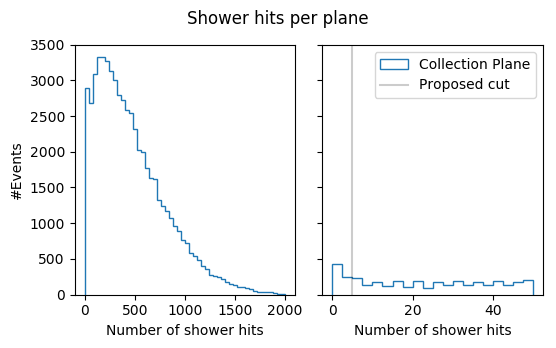

In [9]:
# Shower hits on collection plane
plt.style.use('default')
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(3.5*gr,3.5),sharey=True)
plt.suptitle(r'Shower hits per plane')
N=50

series_obj = df_pass[df_pass['pure']]['shower_nhits'].apply(lambda x: sum(x))
obj =np.vstack( series_obj.values )

labels=['Collection Plane']
ax[0].hist(obj, N,range=(0,2000), histtype='step', stacked=False, fill=False,label=labels)
b = ax[1].hist(obj, 20,range=(0,50), histtype='step', stacked=False, fill=False,label=labels)
ax[1].axvline(x=5,alpha=.2,color='k',label='Proposed cut')


handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1],loc='upper right')

ax[0].set_ylabel('#Events')
ax[0].set_xlabel('Number of shower hits')
ax[1].set_xlabel('Number of shower hits')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('shower_hits.pdf')

In [10]:
# Track proton score

def track_length(row):
    length=[]
    looplist= zip(row['track_start_x'],row['track_start_y'],row['track_start_z'],
               row['track_end_x'],row['track_end_y'],row['track_end_z'])
    
    for x,y,z,e_x,e_y,e_z in looplist:
        l2 = np.sqrt( (x-e_x)**2+(y-e_y)**2+(z-e_z)**2)
        if l2 > 1500:
            print('Problem',[x-e_x,y-e_y,z-e_z],l2 )
        length.append(l2)
    
    return length

df_plot = df_pass[df_pass['select']]
df_plot['track_length'] = df_plot.apply(track_length,axis=1)


/home/wouter/anaconda3/envs/rootenv/lib/python3.4/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Selection on predict_p with cut value 0.001 :
Category:  2212 	Events left:  7 	Events right 56840
Category:  13/-13 	Events left:  5147 	Events right 20893
Category:  11   	Events left:  331 	Events right 17758
Category:  2112 	Events left:  467 	Events right 17180
Category:  22   	Events left:  165 	Events right 2547
Category:  211  	Events left:  9 	Events right 2575

Selection on track_length with cut value 250 :
Category:  2212 	Events left:  56793 	Events right 54
Category:  13/-13 	Events left:  24464 	Events right 1589
Category:  11   	Events left:  18085 	Events right 4
Category:  2112 	Events left:  17561 	Events right 88
Category:  22   	Events left:  2712 	Events right 0
Category:  211  	Events left:  2581 	Events right 3


{-321: 16,
 -211: 1740,
 -13: 14454,
 -11: 59,
 0: 5287,
 11: 18089,
 13: 11599,
 22: 2712,
 211: 15909,
 321: 208,
 2112: 2584,
 2212: 56847,
 3112: 1,
 3222: 91}

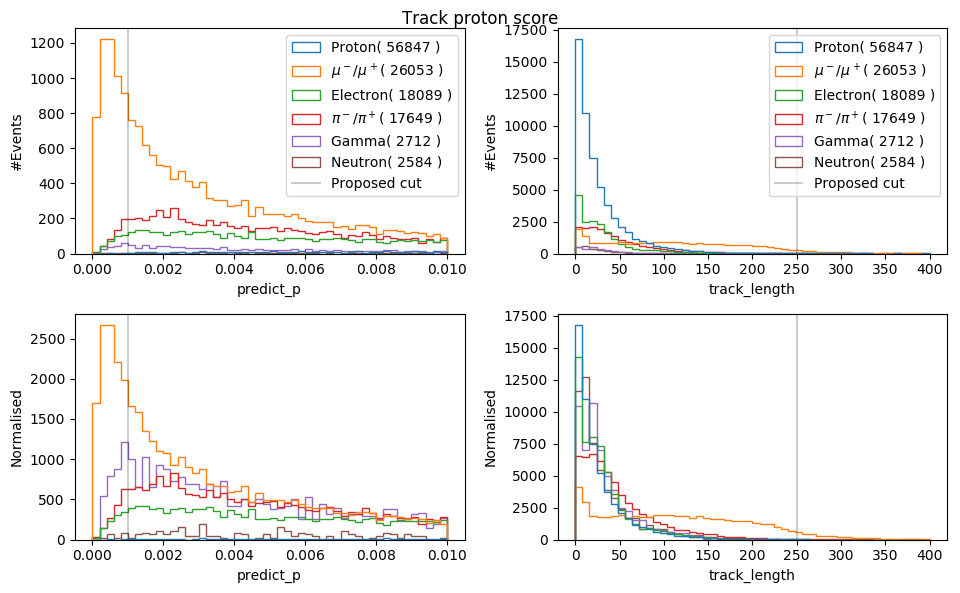

In [16]:
plt.style.use('default')
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(6*gr,6),sharey=False)
plt.suptitle(r'Track proton score')
N=50
pdgs = np.hstack( df_plot['matched_tracks'].values )

#fields=['predict_p','predict_mu','predict_cos','track_pca']
#cuts=[0.001,0.6,0.6,0.988]
#ranges=[(0.0,.01),(0,1),(0,1),(0.95,1.0)]

fields = ['predict_p','track_length']
cuts=[0.001,250]
ranges=[(0.0,.01),(0,400)]
for index,(field,cut,range) in enumerate(zip(fields,cuts,ranges)):
    lengths =np.hstack( df_plot[field].values )

    lengths_e = lengths[np.where(pdgs==11)]
    lengths_m = lengths[np.where(abs(pdgs)==13)]
    lengths_p = lengths[np.where(pdgs==2212)]
    lengths_n = lengths[np.where(pdgs==2112)]
    lengths_g = lengths[np.where(pdgs==22)]
    lengths_pi= lengths[np.where(abs(pdgs)==211)]

    data=[lengths_p,lengths_m,lengths_e,lengths_pi,lengths_g,lengths_n]
    
    datalen=[len(x) for x in data]
    datalen=[[max(datalen)/x]*x for x in datalen]

    labels = ['Proton',
              r'$\mu^-/\mu^+$', 
              'Electron',
              r'$\pi^-/\pi^+$',
              'Gamma',
              'Neutron']
    
    pdglab = ['2212',"13/-13",'11  ','2112','22  ','211 ']
    
    print('\nSelection on',field,'with cut value', cut,':')

    labels2=[]
    for lab,dat,pdg in zip(labels,data,pdglab):
        left  = sum(dat<cut)
        right = sum(dat>cut)
        print('Category: ',pdg,'\tEvents left: ',left,'\tEvents right',right)
        
        lab=lab+'( '+str(len(dat))+' )'
        labels2.append(lab)

    ax[0][index].hist(data, N, range, histtype='step', stacked=False, fill=False,label=labels2)
    ax[1][index].hist(data, N, range, histtype='step',weights=datalen, stacked=False, fill=False,label=labels)
    ax[0][index].axvline(x=cut,alpha=.2,color='k',label='Proposed cut')
    ax[1][index].axvline(x=cut,alpha=.2,color='k',label='Proposed cut')

    ax[0][index].legend()
    ax[0][index].set_ylabel('#Events')
    ax[0][index].set_xlabel(field)

    ax[1][index].set_ylabel('Normalised')
    ax[1][index].set_xlabel(field)

    handles, labels = ax[0][index].get_legend_handles_labels()
    ax[0][index].legend(handles[::-1], labels[::-1],loc='upper right')

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('trackBDT.pdf')

unique, counts = np.unique(pdgs, return_counts=True)
dict(zip(unique, counts))

In [12]:
def KatrinBDT(row):
    if np.all(row['predict_p']>0.001):
        if np.all(row['predict_mu']<0.6):
            if np.all(row['predict_cos']<0.6):
                return True
    return False

def KatrinBDT_plus(row):
    if np.all( row['predict_p']>0.001 | row['track_pca']<0.99 | row['predict_em']>0.5 | row['predict_pi']>0.5):
        if np.all(row['predict_mu']<0.6):
            if np.all(row['predict_cos']<0.6):
                return True
    return False

In [13]:
df_pass['Katrin']= df_pass.apply(KatrinBDT,axis=1)
df_pass['Katrin_plus']= df_pass.apply(KatrinBDT_plus,axis=1)

TypeError: ("ufunc 'bitwise_or' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''", 'occurred at index 0')

In [ ]:
print(len(df_pass[ df_pass['select']    ].index)) 
print(len(df_pass[ df_pass['select'] &  df_pass['pure'] ].index)) 
print(len(df_pass[ df_pass['select'] & df_pass['Katrin']    ].index)) 
print(len(df_pass[ df_pass['select'] & df_pass['Katrin']  &   df_pass['pure'] ].index)) 
print(len(df_pass[ df_pass['select'] & df_pass['Katrin_plus']    ].index)) 
print(len(df_pass[ df_pass['select'] & df_pass['Katrin_plus']  &   df_pass['pure'] ].index)) 